/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_87727/1010190414.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, real_data], ignore_index=True)


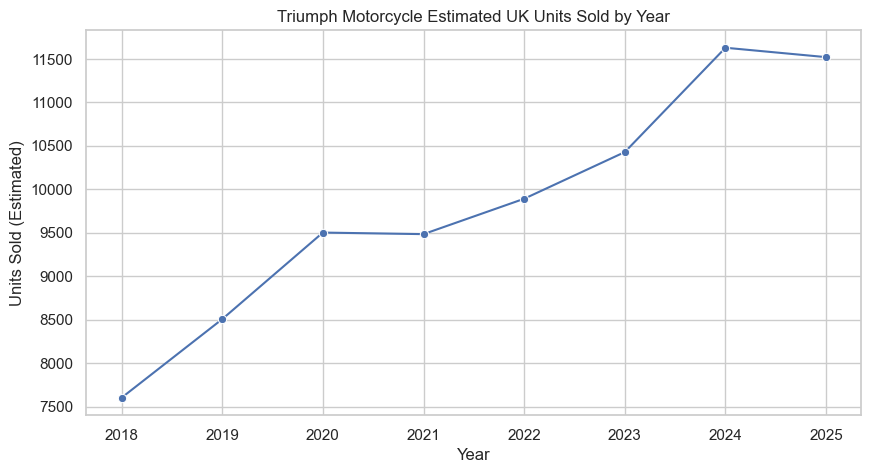

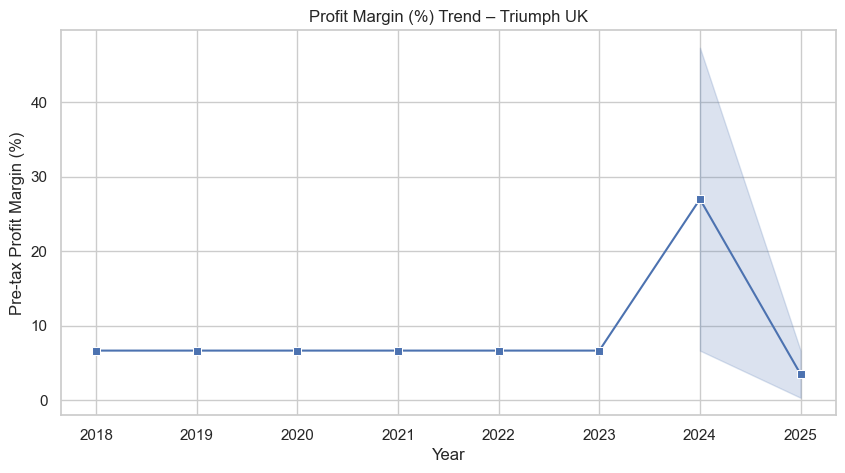

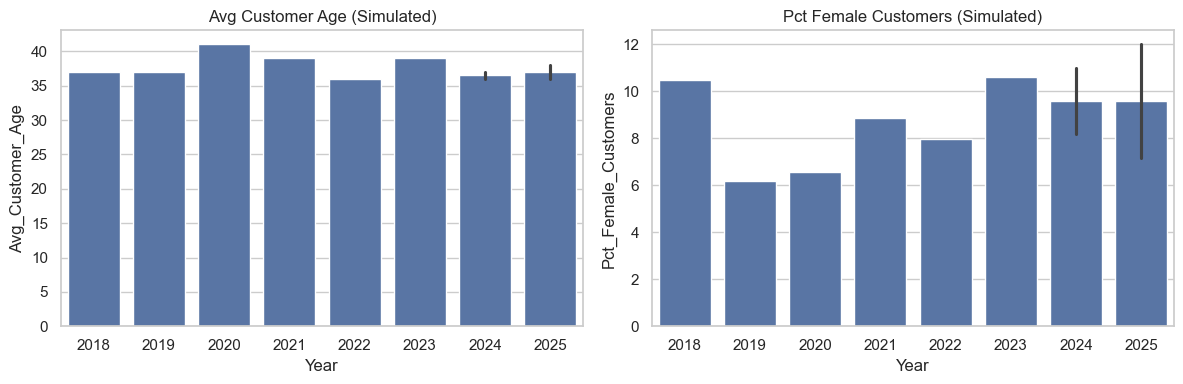

### Average UK Units Sold (2018–2025): 9820
### Average Profit Margin UK (2018–2025): 10.1 %


In [2]:
# %%
# ## Triumph UK Sales & Profit Analytics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# %%
# ## 1) Define dataset structure

columns = [
    "Year",
    "Units_Sold_UK",
    "Turnover_UK",
    "PreTax_Profit_UK",
    "Profit_Margin_UK",
    "Avg_Customer_Age",
    "Pct_Female_Customers",
]

df = pd.DataFrame(columns=columns)

# %%
# ## 2) Add real contextual data (FIXED - no append)

real_data = pd.DataFrame([
    {
        "Year": 2025,
        "Units_Sold_UK": np.nan,
        "Turnover_UK": 653.1,
        "PreTax_Profit_UK": 2.2,
        "Profit_Margin_UK": (2.2 / 653.1) * 100,
        "Avg_Customer_Age": 38,
        "Pct_Female_Customers": 12
    },
    {
        "Year": 2024,
        "Units_Sold_UK": np.nan,
        "Turnover_UK": 83.9,
        "PreTax_Profit_UK": 39.7,
        "Profit_Margin_UK": (39.7 / 83.9) * 100,
        "Avg_Customer_Age": 37,
        "Pct_Female_Customers": 11
    }
])

df = pd.concat([df, real_data], ignore_index=True)

# %%
# ## 3) Simulate example UK sales & demographics

np.random.seed(42)
years = list(range(2018, 2026))
simulated_sales = np.linspace(8000, 12000, len(years)) + np.random.randint(-500, 500, len(years))

demo_age = np.random.normal(loc=38, scale=2.5, size=len(years)).astype(int)
pct_female = np.random.normal(loc=10, scale=2, size=len(years))

sim_data = pd.DataFrame({
    "Year": years,
    "Units_Sold_UK": simulated_sales.astype(int),
    "Turnover_UK": (simulated_sales * 9) / 1000,
    "PreTax_Profit_UK": (simulated_sales * 0.6) / 1000,
    "Avg_Customer_Age": demo_age,
    "Pct_Female_Customers": pct_female
})

sim_data["Profit_Margin_UK"] = (
    sim_data["PreTax_Profit_UK"] / sim_data["Turnover_UK"]
) * 100

# %%
# ## 4) Merge simulated & real

full_df = (
    pd.concat([df, sim_data], ignore_index=True)
      .sort_values("Year")
      .reset_index(drop=True)
)

# %%
# ## 5) Basic analysis: sales & margins over time

plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Units_Sold_UK", data=full_df, marker="o")
plt.title("Triumph Motorcycle Estimated UK Units Sold by Year")
plt.ylabel("Units Sold (Estimated)")
plt.show()

# %%
# Profit margin trend

plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Profit_Margin_UK", data=full_df, marker="s")
plt.title("Profit Margin (%) Trend – Triumph UK")
plt.ylabel("Pre-tax Profit Margin (%)")
plt.show()

# %%
# ## 6) Demographics visualization

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x="Year", y="Avg_Customer_Age", data=full_df, ax=axes[0])
axes[0].set_title("Avg Customer Age (Simulated)")

sns.barplot(x="Year", y="Pct_Female_Customers", data=full_df, ax=axes[1])
axes[1].set_title("Pct Female Customers (Simulated)")

plt.tight_layout()
plt.show()

# %%
# ## 7) Summary metrics

print("### Average UK Units Sold (2018–2025):",
      int(np.nanmean(full_df["Units_Sold_UK"])))

print("### Average Profit Margin UK (2018–2025):",
      round(np.nanmean(full_df["Profit_Margin_UK"]), 2), "%")
